<a href="https://colab.research.google.com/github/sbfrusho/AI-LAB/blob/main/Copy_of_4_Mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load dataset

trainX.shape: (50000, 32, 32, 3), trainY.shape: (50000, 1), testX.shape: (10000, 32, 32, 3), testY.shape: (10000, 1))
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


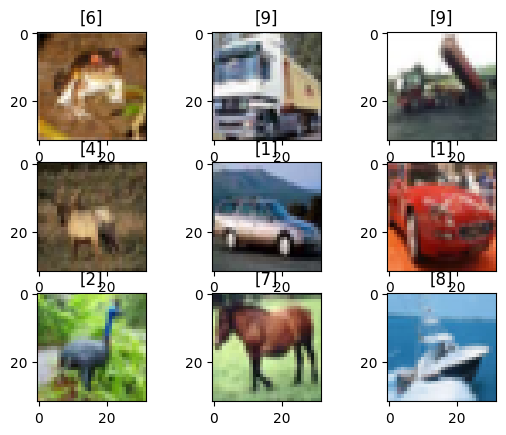

In [ ]:

import keras
from keras.datasets.cifar10 import load_data
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model
from keras.applications import MobileNet
import matplotlib.pyplot as plt
import numpy as np

def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()

# Load data
(trainX, trainY), (testX, testY) = load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {})'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Dispaly some loaded image data
display_img(trainX[:9], trainY[:9])


Prepare dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainX = trainX / 255.0
testX = testX/ 255.0
trainX = tf.image.resize(trainX, (96,96))
testX = tf.image.resize(testX, (96, 96))

# Investigate the original data shape
print(f"Original trainX.shape: {trainX.shape}, testX.shape: {testX.shape}")

# Normalize the data (convert to float32 and scale to [0, 1])


# Turn y into one-hot encoding for 10-class classification
trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)

# Investigate updated shapes and ranges
print(f"trainX.shape: {trainX.shape}, testX.shape: {testX.shape}")j
print(f"trainX.dtype: {trainX.dtype}, testX.dtype: {testX.dtype}")
print(f"trainY.shape: {trainY.shape}, testY.shape: {testY.shape}")
print(f"trainY.dtype: {trainY.dtype}, testY.dtype: {testY.dtype}")

# Check sample labels
print("Sample trainY (one-hot encoded):")
print(trainY[:5])


Original trainX.shape: (50000, 96, 96, 3), testX.shape: (10000, 96, 96, 3)
trainX.shape: (50000, 96, 96, 3), testX.shape: (10000, 96, 96, 3)
trainX.dtype: <dtype: 'float32'>, testX.dtype: <dtype: 'float32'>
trainY.shape: (50000, 10), testY.shape: (10000, 10)
trainY.dtype: float64, testY.dtype: float64
Sample trainY (one-hot encoded):
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


 Build the MobileNet-Based Model

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Load pre-trained MobileNet
mobilenet = MobileNet(input_shape=(96, 96, 3), include_top=False)


# Freeze all layers in the MobileNet backbone
for layer in mobilenet.layers:
    layer.trainable = False

inputs_mobilenet = mobilenet.inputs
outputs_mobilenet = mobilenet.output
x = GlobalAveragePooling2D()(outputs_mobilenet)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)

x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs_final = Dense(10, name = 'OutputLayer', activation = 'softmax')(x)
model = Model(inputs_mobilenet, outputs_final, name = 'Multi-Class-Classifier')

<ipython-input-3-f118b7f4ff72>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(input_shape=(96, 96, 3), include_top=False)


Transfer Learning
Freeze the MobileNet backbone and train only the custom layers.

In [ ]:
import tensorflow as tf
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(trainX, trainY, batch_size = 128, validation_split = 0.1, epochs = 15)

Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.7039 - loss: 0.8980 - val_accuracy: 0.8170 - val_loss: 0.5226
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8222 - loss: 0.5061 - val_accuracy: 0.8270 - val_loss: 0.4883
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8489 - loss: 0.4324 - val_accuracy: 0.8330 - val_loss: 0.4727
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8615 - loss: 0.3909 - val_accuracy: 0.8392 - val_loss: 0.4697
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8741 - loss: 0.3498 - val_accuracy: 0.8330 - val_loss: 0.4895
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8854 - loss: 0.3276 - val_accuracy: 0.8338 - val_loss: 0.4905
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8925 - loss: 0.2986 - val_accuracy: 0.8304 - val_loss: 0.5094
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9059 - loss: 0.2637 - v

In [ ]:
model.evaluate(testX, testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8362 - loss: 0.5744


[0.589833676815033, 0.8363999724388123]

Fine Tuning

In [ ]:
import tensorflow as tf
# Unfreeze the last few layers of MobileNet
for layer in mobilenet.layers[-40:]:
    layer.trainable = True

# Compile with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune model
history_finetune = model.fit(trainX, trainY, validation_split=0.1, epochs=15, batch_size=32)

# Evaluate model
finetune_loss, finetune_accuracy = model.evaluate(testX, testY)
print(f"Fine-Tuning Accuracy: {finetune_accuracy}")


Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 24ms/step - accuracy: 0.7455 - loss: 1.1077 - val_accuracy: 0.8208 - val_loss: 0.6950
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.8186 - loss: 0.6670 - val_accuracy: 0.8414 - val_loss: 0.5699
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8458 - loss: 0.5413 - val_accuracy: 0.8594 - val_loss: 0.4965
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8646 - loss: 0.4476 - val_accuracy: 0.8644 - val_loss: 0.4569
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8762 - loss: 0.3934 - val_accuracy: 0.8688 - val_loss: 0.4259
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8899 - loss: 0.3299 - val_accuracy: 0.8736 - val_loss: 0.4059
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9002 - loss: 0.2937 - val_accuracy: 0.8760 - val_loss: 0.3911
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9058 -

In [ ]:
model.evaluate(testX, testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8903 - loss: 0.3605


[0.3547784090042114, 0.89410001039505]